In [1]:
import pandapower.plotting
from pandapower.tdpf.test_system import *
from pandapower.tdpf.create_jacobian_tdpf import *

In [2]:
net = test_grid(load_scaling=0.25, sgen_scaling=0.5)
net

This pandapower network includes the following parameter tables:
   - bus (5 elements)
   - load (3 elements)
   - sgen (4 elements)
   - ext_grid (1 element)
   - line (6 elements)
   - bus_geodata (5 elements)

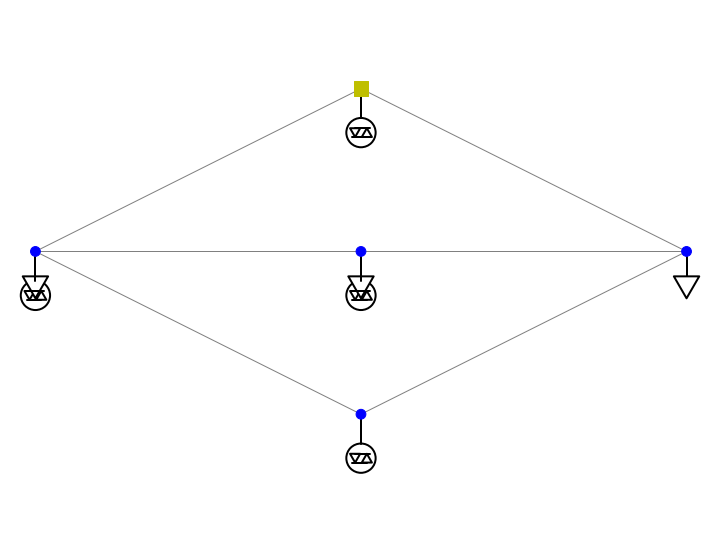

<AxesSubplot:>

In [3]:
pp.plotting.simple_plot(net, plot_loads=True, plot_sgens=True, plot_gens=True, load_size=3, sgen_size=3, gen_size=3)

In [4]:
pp.runpp(net)
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,-62.533279,110.416703,63.772438,-104.037595,1.239159,6.379108,0.528591,0.533705,0.533705,1.050000,0.000000,1.000052,2.307481,55.594251
1,-6.632980,119.983432,7.746556,-114.378706,1.113576,5.604726,0.500564,0.506460,0.506460,1.050000,0.000000,0.990055,0.751469,52.756264
2,-116.250605,13.412761,117.168983,-8.712926,0.918378,4.699835,0.511811,0.512248,0.512248,1.000052,2.307481,1.003219,5.151477,53.359125
3,27.478167,30.624833,-27.406216,-30.829542,0.071952,-0.204709,0.179954,0.182104,0.182104,1.000052,2.307481,0.990763,1.964142,18.969173
4,182.831017,8.712926,-180.600055,4.228876,2.230962,12.941802,0.798017,0.798074,0.798074,1.003219,5.151477,0.990055,0.751469,83.132719
5,-77.146501,10.149830,77.406216,-9.170458,0.259715,0.979372,0.343755,0.344111,0.344111,0.990055,0.751469,0.990763,1.964142,35.844871


In [5]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.050000,0.000000,69.166259,-230.400135
1,1.000052,2.307481,25.000000,60.000000
2,1.003219,5.151477,-300.000000,0.000000
3,0.990055,0.751469,250.000000,100.000000
4,0.990763,1.964142,-50.000000,40.000000


In [6]:
t_amb = 40
r_ref = net.line.at[0, 'r_ohm_per_km'] / 1e3
a0, a1, a2, tau = calc_a0_a1_a2_tau(t_amb, 90, r_ref, 18.2e-3,
                                    525, 0.5, 45, 1000)
calc_t_ss(net.res_line.i_ka.values * 1e3, a0, a1, a2)

array([66.80910338, 64.91880867, 65.31056147, 50.66304692, 91.8230765 ,
       55.97017163])

In [15]:
pp.runpp(net, tdpf=True, max_iteration=100, tolerance_mva=1e-6)

In [11]:
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent,r_ohm_per_km,temperature_degree_celsius
0,-61.968552,110.097458,63.424367,-103.787242,1.455815,6.310216,0.526276,0.531399,0.531399,1.050000,0.000000,1.001138,2.381301,55.354053,0.069923,66.282029
1,-5.953195,120.123355,7.267494,-114.506541,1.314299,5.616815,0.500998,0.506896,0.506896,1.050000,0.000000,0.990034,0.832119,52.801626,0.069515,64.553898
2,-116.097933,12.235239,117.174574,-7.580232,1.076641,4.655007,0.510028,0.510421,0.510421,1.001138,2.381301,1.006184,5.214484,53.168809,0.069658,65.159719
3,27.673565,31.552004,-27.589705,-31.740716,0.083860,-0.188712,0.183356,0.185529,0.185529,1.001138,2.381301,0.991463,2.047345,19.325926,0.066243,50.691084
4,182.825426,7.580232,-179.975085,5.267109,2.850341,12.847342,0.795422,0.795451,0.795451,1.006184,5.214484,0.990034,0.832119,82.859506,0.075875,91.506079
5,-77.292410,9.239431,77.589705,-8.259284,0.297296,0.980146,0.343901,0.344223,0.344223,0.990034,0.832119,0.991463,2.047345,35.856538,0.067487,55.961035


In [12]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.050000,0.000000,67.921748,-230.220814
1,1.001138,2.381301,25.000000,60.000000
2,1.006184,5.214484,-300.000000,0.000000
3,0.990034,0.832119,250.000000,100.000000
4,0.991463,2.047345,-50.000000,40.000000
